In [291]:
# BIBLIOTECAS NECESSÁRIAS
import numpy as np
import matplotlib.pyplot as plt

In [292]:
NumeroEpocas = 40     # NÚMERO DE ÉPOCAS

q = 13                # NÚMERO DE PADRÕES

eta = 0.02            # TAXA DE APRENDIZADO

M = 2                 # NÚMERO DE NEURÔNIOS NA CAMADA DE ENTRADA

N = 2                 # NÚMERO DE NEURÔNIOS NA CAMADA ESCONDIDA

L = 1                 # NÚMERO DE NEURÔNIOS NA CAMADA DE SAÍDA

# OBS: PODE-SE MUDAR OS VALORES DE 'NumeroEpocas', 'eta' E 'N', DA REDE PARA ESTUDAR OS DIFERENTES RESULTADOS DE TREINAMENTO.

In [278]:
# CARREGAR OS DADOS DE TREINAMENTO
peso = np.array ([113, 122, 107, 98, 115, 120, 104, 108, 117, 101, 112, 106, 116])
ph = np.array ([6.8, 4.7, 5.2, 3.6, 2.9, 4.2, 6.3, 4.0, 6.3, 4.2, 5.6, 3.1, 5.0])

In [279]:
# VETOR DE CLASSIFICAÇÃO DESEJADA
d = np.array ([-1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1])

In [280]:
# INICIAR ALEATORIAMENTE AS MATRIZES DE PESOS
W1 = np.random.random ((N, M + 1))
W2 = np.random.random ((L, N + 1))

In [281]:
# ARRAY PARA ARMAZENAR OS ERROS
E = np.zeros(q)
etm = np.zeros (NumeroEpocas)

In [282]:
# BIAS
bias = 1

In [283]:
# ENTRADA DO PERCEPTRON
x = np.vstack ((peso, ph))

## TREINAMENTO DA REDE

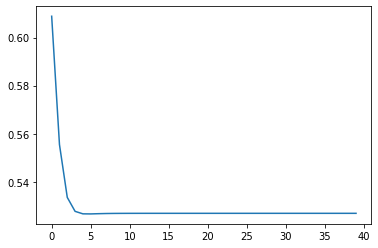

In [284]:
for i in range (NumeroEpocas):
  for j in range (q):

    # INSERE O BIAS NO VATOR DE ENTRADA
    xb = np.hstack ((bias, x[:, j]))
    # SAÍDA DA CAMADA ESCONDIDA
    O1 = np.tanh (W1.dot(xb))
    # INSERINDO O BIAS. SAÍDA DA CAMADA ESCONDIDA É A ENTRADA DA CAMADA DE SAÍDA
    O1b = np.insert (O1, 0, bias)
    # NEURÔNIO NETWORK OUTPUT
    y = np.tanh (W2.dot(O1b))   # EQUAÇÕES (3) E (4) JUNTAS
    e = d[j] - y                # EQUAÇÃO (5)
    # ERRO TOTAL
    E[j] = (e.transpose().dot(e))/2   # EQUAÇAO DE ERRO QUADRÁTICO
    # IMPRIMIR O NÚMERO DA ÉPOCA E O ERRO TOTAL

    # ERROR BACKPROPAGATION
    # CÁLCULO DO GRADIENTE NA CAMADA DE SAÍDA
    delta2 = np.diag(e).dot((1 - y * y))            #EQ(6)
    vdelta2 = (W2.transpose()).dot(delta2)          #EQ(7)
    delta1 = np.diag (1 - O1b * O1b).dot(vdelta2)   #EQ(8)

    # ATUALIZAÇÃO DOS PESOS
    W1 = W1 + eta*(np.outer(delta1[:1], xb))
    W2 = W2 + eta*(np.outer(delta2, O1b))
  
  etm[i] = E.mean()

plt.plot(etm)
plt.show()

In [285]:
# OBS: O GRÁFICO MOSTRAR A CURVA DE APRENDIZADO DA REDE

# RESULTADO DO TREINAMENTO

In [286]:
error_teste = np.zeros(q)

for i in range (q):
  # INSERIR A BIAS NO VETOR DE ENTRADA
  xb = np.hstack((bias, x [:, i]))

  #SAÍDA DA CAMADA ESCONDIDA
  O1 = np.tanh (W1.dot(xb))

  #INCLUINDO O BIAS. SAÍDA DA CAMADA ESCONDIDA É A ENTRADA DA CAMADA DE SAÍDA
  O1b = np.insert (O1, 0, bias)

  # NEURAL NETWORK OUTPUT
  y = np.tanh (W2.dot(O1b))

  error_teste [i] = d[i] - y

  print(error_teste)
  print(np.round(error_teste) - d)

[-1.05773023  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
[ 0. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1.]
[-1.05773023  0.94226977  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
[ 0.  0.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1.]
[-1.05773023  0.94226977 -1.05773023  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
[ 0.  0.  0. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1.]
[-1.05773023  0.94226977 -1.05773023  0.94226978  0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
[ 0.  0.  0.  0. -1. -1.  1. -1.  1. -1.  1. -1.  1.]
[-1.05773023  0.94226977 -1.05773023  0.94226978  0.94226977  0.
  0.          0.          0.          0.          0.          0.
  0.        ]
[ 0.  0.  0.  0.  0. -1.  1. -1.  1. -1.  1. -1.  1.]
[-1.057730

In [287]:
# OBS: SI TODOS OS NÚMEROS DA ÚLTIMA ÉPOCA DO TREINAMENTO ESTIVER '0' SIGNIFICA QUE A REDE ACERTOS TODOS

# TESTE DA REDE COM DADOS QUE AINDA NÃO VIU

In [288]:
# CARREGAR OS DADOS DE TESTE
peso = np.array ([110, 113, 120, 125, 97])
ph = np.array ([6.0, 4.4, 3.5, 5.5, 5.0])

In [289]:
# VETOR DE CLASSIFICAÇÃO DESEJADA
d = np.array ([-1, -1, 1, 1, 1])

In [290]:
error_teste = np.zeros(5)

for i in range (5):
  # INSERIR A BIAS NO VETOR DE ENTRADA
  xb = np.hstack((bias, x [:, i]))

  #SAÍDA DA CAMADA ESCONDIDA
  O1 = np.tanh (W1.dot(xb))

  #INCLUINDO O BIAS. SAÍDA DA CAMADA ESCONDIDA É A ENTRADA DA CAMADA DE SAÍDA
  O1b = np.insert (O1, 0, bias)

  # NEURAL NETWORK OUTPUT
  y = np.tanh (W2.dot(O1b))

  error_teste [i] = d[i] - y

  print(error_teste)
  print(np.round(error_teste) - d)

[-1.05773023  0.          0.          0.          0.        ]
[ 0.  1. -1. -1. -1.]
[-1.05773023 -1.05773023  0.          0.          0.        ]
[ 0.  0. -1. -1. -1.]
[-1.05773023 -1.05773023  0.94226977  0.          0.        ]
[ 0.  0.  0. -1. -1.]
[-1.05773023 -1.05773023  0.94226977  0.94226978  0.        ]
[ 0.  0.  0.  0. -1.]
[-1.05773023 -1.05773023  0.94226977  0.94226978  0.94226977]
[0. 0. 0. 0. 0.]
